# Approach 1  - Using Image - Model 1 - LRCN
 

### Importing all the neceaasry package

In [ ]:
import csv
import numpy as np
import random
import glob
import os.path
import sys
import operator
import threading
from processor import process_image
from keras.utils import to_categorical

In [2]:
sequence_path = os.path.join('data', 'sequences')

In [3]:
seq_length = 40
max_frames = 300  # max number of frames a video can have for us to use it

# for ['conv_3d', 'c3d', 'lrcn']
input_shape = (seq_length, 80, 80, 3)
data_type = 'images'
image_shape = (80, 80, 3)

In [4]:
##################################              get data 

with open(os.path.join('data', 'data_file.csv'), 'r') as fin:
    reader = csv.reader(fin)
    data = list(reader)


#################################                Get Class     
classes = []
for item in data:
    if item[1] not in classes:
        classes.append(item[1])

# Sort them.
classes = sorted(classes)

#############################                     clean data 

data_clean = []
for item in data:
    if int(item[3]) >= seq_length and int(item[3]) <= max_frames and item[1] in classes:
        data_clean.append(item)    
    



data=  data_clean
    

In [7]:
# function to split the data 
def split_train_test():
    train = []
    test = []
    finaltest=[]
    for item in data:
        if item[0] == 'train':
            train.append(item)
        if item[0] == 'finaltest':
            finaltest.append(item)
        if item[0] == 'test':
            test.append(item)
    return train, test, finaltest

In [8]:
# Function to make y variable one hot encoding 
def get_class_one_hot(class_str):

    # Encode it first.
    label_encoded = classes.index(class_str)

    # Now one-hot it.
    label_hot = to_categorical(label_encoded, len(classes))

    assert len(label_hot) == len(classes)
#     print("one hot encodervalue ")
#     print(label_hot)

    return label_hot

In [9]:
# function to build the sequence from image  
def build_image_sequence(frames):

    return [process_image(x, image_shape) for x in frames]




In [10]:

def get_extracted_sequence( data_type, sample):

    filename = sample[2]
    path = os.path.join(sequence_path, filename + '-' + str(seq_length) + '-' + data_type + '.npy')
    if os.path.isfile(path):
        return np.load(path)
    else:
        return None




In [11]:
def get_frames_for_sample(sample):

    path = os.path.join('data', sample[0], sample[1])
    filename = sample[2]
    images = sorted(glob.glob(os.path.join(path, filename + '*jpg')))
    return images


In [12]:

def get_filename_from_image(filename):
    parts = filename.split(os.path.sep)
    return parts[-1].replace('.jpg', '')

In [13]:
# FUNCTION TO resca; the image 
def rescale_list(input_list, size):

    assert len(input_list) >= size

    # Get the number to skip between iterations.
    skip = len(input_list) // size

    # Build our new output.
    output = [input_list[i] for i in range(0, len(input_list), skip)]

    # Cut off the last one if needed.
    return output[:size]




In [14]:
from sklearn.preprocessing import LabelEncoder

newy = LabelEncoder()


In [15]:
def get_all_sequences_in_memory(train_test_finaltest, data_type):
 
    # Get the right dataset.
    train, test, finaltest = split_train_test()

    if train_test_finaltest == 'test':
        data= test
    if train_test_finaltest == 'train':
        data = train
    if train_test_finaltest == 'finaltest':
        data= finaltest




    print("Loading %d samples into memory for %sing." % (len(data), train_test_finaltest))
#     print(data)

    X, y = [], []
    data = data[0:500]
    for row in data:
#         print("****************************************************")

#         print(row)
        
        if data_type == 'images':

            frames = get_frames_for_sample(row)
            frames = rescale_list(frames, seq_length)

            # Build the image sequence
            sequence = build_image_sequence(frames)
#             pbar_test = tqdm(total=len(data))

        else:
            sequence = get_extracted_sequence(data_type, row)

            if sequence is None:
                print("Can't find sequence. Did you generate them?")
                raise

        X.append(sequence)
#         y.append((row[1]))
        y.append(get_class_one_hot(row[1]))

#         print("*********????????????? printying xarry value of getall sequency in memory ///////")
#         print(np.array(X))
#         print("*********????????????? printying yarry value of getall sequency in memory ///////")
#         print(np.array(y))

    return np.array(X), np.array(y)



In [17]:
def get_all_sequences_in_memory_train1(train_test_finaltest, data_type):
 
    # Get the right dataset.
    train, test, finaltest = split_train_test()

    if train_test_finaltest == 'test':
        data= test
    if train_test_finaltest == 'train':
        data = train
    if train_test_finaltest == 'finaltest':
        data= finaltest




    print("Loading %d samples into memory for %sing." % (len(data), train_test_finaltest))
#     print(data)

    X, y = [], []
    data = data[0:1000]
    for row in data:
#         print("****************************************************")

#         print(row)
        
        if data_type == 'images':

            frames = get_frames_for_sample(row)
            frames = rescale_list(frames, seq_length)

            # Build the image sequence
            sequence = build_image_sequence(frames)
#             pbar_test = tqdm(total=len(data))

        else:
            sequence = get_extracted_sequence(data_type, row)

            if sequence is None:
                print("Can't find sequence. Did you generate them?")
                raise

        X.append(sequence)
#         y.append((row[1]))
        y.append(get_class_one_hot(row[1]))

#         print("*********????????????? printying xarry value of getall sequency in memory ///////")
#         print(np.array(X))
#         print("*********????????????? printying yarry value of getall sequency in memory ///////")
#         print(np.array(y))

    return np.array(X), np.array(y)



In [18]:
def get_all_sequences_in_memory_train2(train_test_finaltest, data_type):
 
    # Get the right dataset.
    train, test, finaltest = split_train_test()

    if train_test_finaltest == 'test':
        data= test
    if train_test_finaltest == 'train':
        data = train
    if train_test_finaltest == 'finaltest':
        data= finaltest




    print("Loading %d samples into memory for %sing." % (len(data), train_test_finaltest))
#     print(data)

    X, y = [], []
    data = data[1000:2000]
    for row in data:
#         print("****************************************************")

#         print(row)
        
        if data_type == 'images':

            frames = get_frames_for_sample(row)
            frames = rescale_list(frames, seq_length)

            # Build the image sequence
            sequence = build_image_sequence(frames)
#             pbar_test = tqdm(total=len(data))

        else:
            sequence = get_extracted_sequence(data_type, row)

            if sequence is None:
                print("Can't find sequence. Did you generate them?")
                raise

        X.append(sequence)
#         y.append((row[1]))
        y.append(get_class_one_hot(row[1]))

#         print("*********????????????? printying xarry value of getall sequency in memory ///////")
#         print(np.array(X))
#         print("*********????????????? printying yarry value of getall sequency in memory ///////")
#         print(np.array(y))

    return np.array(X), np.array(y)



In [18]:
def get_all_sequences_in_memory_train3(train_test_finaltest, data_type):

    # Get the right dataset.
    train, test, finaltest = split_train_test()

    if train_test_finaltest == 'test':
        data= test
    if train_test_finaltest == 'train':
        data = train
    if train_test_finaltest == 'finaltest':
        data= finaltest




    print("Loading %d samples into memory for %sing." % (len(data), train_test_finaltest))
#     print(data)

    X, y = [], []
    data = data[3000:4500]
    for row in data:
#         print("****************************************************")

#         print(row)
        
        if data_type == 'images':

            frames = get_frames_for_sample(row)
            frames = rescale_list(frames, seq_length)

            # Build the image sequence
            sequence = build_image_sequence(frames)
#             pbar_test = tqdm(total=len(data))

        else:
            sequence = get_extracted_sequence(data_type, row)

            if sequence is None:
                print("Can't find sequence. Did you generate them?")
                raise

        X.append(sequence)
#         y.append((row[1]))
        y.append(get_class_one_hot(row[1]))

#         print("*********????????????? printying xarry value of getall sequency in memory ///////")
#         print(np.array(X))
#         print("*********????????????? printying yarry value of getall sequency in memory ///////")
#         print(np.array(y))

    return np.array(X), np.array(y)



In [19]:
def get_all_sequences_in_memory_train4(train_test_finaltest, data_type):
 
    # Get the right dataset.
    train, test, finaltest = split_train_test()

    if train_test_finaltest == 'test':
        data= test
    if train_test_finaltest == 'train':
        data = train
    if train_test_finaltest == 'finaltest':
        data= finaltest




    print("Loading %d samples into memory for %sing." % (len(data), train_test_finaltest))
#     print(data)

    X, y = [], []
    data = data[4500:6000]
    for row in data:
#         print("****************************************************")

#         print(row)
        
        if data_type == 'images':

            frames = get_frames_for_sample(row)
            frames = rescale_list(frames, seq_length)

            # Build the image sequence
            sequence = build_image_sequence(frames)
#             pbar_test = tqdm(total=len(data))

        else:
            sequence = get_extracted_sequence(data_type, row)

            if sequence is None:
                print("Can't find sequence. Did you generate them?")
                raise

        X.append(sequence)
#         y.append((row[1]))
        y.append(get_class_one_hot(row[1]))

#         print("*********????????????? printying xarry value of getall sequency in memory ///////")
#         print(np.array(X))
#         print("*********????????????? printying yarry value of getall sequency in memory ///////")
#         print(np.array(y))

    return np.array(X), np.array(y)



In [20]:
def get_all_sequences_in_memory_train5(train_test_finaltest, data_type):

    # Get the right dataset.
    train, test, finaltest = split_train_test()

    if train_test_finaltest == 'test':
        data= test
    if train_test_finaltest == 'train':
        data = train
    if train_test_finaltest == 'finaltest':
        data= finaltest




    print("Loading %d samples into memory for %sing." % (len(data), train_test_finaltest))
#     print(data)

    X, y = [], []
    data = data[6000:7500]
    for row in data:
#         print("****************************************************")

#         print(row)
        
        if data_type == 'images':

            frames = get_frames_for_sample(row)
            frames = rescale_list(frames, seq_length)

            # Build the image sequence
            sequence = build_image_sequence(frames)
#             pbar_test = tqdm(total=len(data))

        else:
            sequence = get_extracted_sequence(data_type, row)

            if sequence is None:
                print("Can't find sequence. Did you generate them?")
                raise

        X.append(sequence)
#         y.append((row[1]))
        y.append(get_class_one_hot(row[1]))

#         print("*********????????????? printying xarry value of getall sequency in memory ///////")
#         print(np.array(X))
#         print("*********????????????? printying yarry value of getall sequency in memory ///////")
#         print(np.array(y))

    return np.array(X), np.array(y)



In [21]:
def get_all_sequences_in_memory_train6(train_test_finaltest, data_type):
 
    # Get the right dataset.
    train, test, finaltest = split_train_test()

    if train_test_finaltest == 'test':
        data= test
    if train_test_finaltest == 'train':
        data = train
    if train_test_finaltest == 'finaltest':
        data= finaltest




    print("Loading %d samples into memory for %sing." % (len(data), train_test_finaltest))
#     print(data)

    X, y = [], []
    data = data[7500:8596]
    for row in data:
#         print("****************************************************")

#         print(row)
        
        if data_type == 'images':

            frames = get_frames_for_sample(row)
            frames = rescale_list(frames, seq_length)

            # Build the image sequence
            sequence = build_image_sequence(frames)
#             pbar_test = tqdm(total=len(data))

        else:
            sequence = get_extracted_sequence(data_type, row)

            if sequence is None:
                print("Can't find sequence. Did you generate them?")
                raise

        X.append(sequence)
#         y.append((row[1]))
        y.append(get_class_one_hot(row[1]))

#         print("*********????????????? printying xarry value of getall sequency in memory ///////")
#         print(np.array(X))
#         print("*********????????????? printying yarry value of getall sequency in memory ///////")
#         print(np.array(y))

    return np.array(X), np.array(y)



In [19]:
from keras.preprocessing import image
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Model, load_model
from keras.layers import Input
import numpy as np
from tqdm import tqdm

In [24]:

# Get model with pretrained weights.
base_model = InceptionV3(weights='imagenet', include_top=True)



In [25]:
# We'll extract features at the final pool layer.
inception_model = Model(inputs=base_model.input,outputs=base_model.get_layer('avg_pool').output)

In [26]:
pbar = tqdm(total=len(data))

  0%|                                                                                        | 0/12014 [00:00<?, ?it/s]

In [27]:

for video in data:

    # Get the path to the sequence for this video.
    path = os.path.join('data', 'sequences', video[2] + '-' + str(seq_length) + '-features')  # numpy will auto-append .npy

    # Check if we already have it.
    if os.path.isfile(path + '.npy'):
        pbar.update(1)
        continue

    # Get the frames for this video.
    frames = get_frames_for_sample(video)

    # Now downsample to just the ones we need.
    frames = rescale_list(frames, seq_length)


    # Now loop through and extract features to build the sequence.
    sequence = []
    for image_path in frames:
        print(image_path)
        img = image.load_img(image_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        # Get the prediction.
        features = inception_model.predict(x)

        features = features[0]
        
        sequence.append(features)

    # Save the sequence.
    np.save(path, sequence)

    pbar.update(1)

pbar.close()


100%|██████████████████████████████████████████████████████████████████████████| 12014/12014 [00:01<00:00, 8292.04it/s]


In [ ]:
# imorting the necessary package 

In [20]:
from keras.layers import Dense, Flatten, Dropout, ZeroPadding3D
from keras.layers.recurrent import LSTM
from keras.models import Sequential, load_model
from keras.optimizers import Adam, RMSprop
from keras.layers.wrappers import TimeDistributed
from keras.layers.convolutional import (Conv2D, MaxPooling3D, Conv3D,
    MaxPooling2D)
from collections import deque
import sys

from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, CSVLogger
import time


In [21]:
nb_classes= len(classes)

In [26]:
# building the model for lrcn 
model_lrcn = Sequential()
model_lrcn.add(TimeDistributed(Conv2D(32, (7, 7), strides=(2, 2),
    activation='relu', padding='same'), input_shape=input_shape))
model_lrcn.add(TimeDistributed(Conv2D(32, (3,3),
    kernel_initializer="he_normal", activation='relu')))
model_lrcn.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))

model_lrcn.add(TimeDistributed(Conv2D(64, (3,3),
    padding='same', activation='relu')))
model_lrcn.add(TimeDistributed(Conv2D(64, (3,3),
    padding='same', activation='relu')))
model_lrcn.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))

model_lrcn.add(TimeDistributed(Conv2D(128, (3,3),
    padding='same', activation='relu')))
model_lrcn.add(TimeDistributed(Conv2D(128, (3,3),
    padding='same', activation='relu')))
model_lrcn.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))

model_lrcn.add(TimeDistributed(Conv2D(256, (3,3),
    padding='same', activation='relu')))
model_lrcn.add(TimeDistributed(Conv2D(256, (3,3),
    padding='same', activation='relu')))
model_lrcn.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))

model_lrcn.add(TimeDistributed(Conv2D(512, (3,3),
    padding='same', activation='relu')))
model_lrcn.add(TimeDistributed(Conv2D(512, (3,3),
    padding='same', activation='relu')))
model_lrcn.add(TimeDistributed(MaxPooling2D((2, 2), strides=(2, 2))))

model_lrcn.add(TimeDistributed(Flatten()))

model_lrcn.add(Dropout(0.5))
model_lrcn.add(LSTM(256, return_sequences=False, dropout=0.5))
model_lrcn.add(Dense(nb_classes, activation='softmax'))


In [27]:

# compiling the model 
metrics = ['accuracy']
if nb_classes >= 10:
    metrics.append('top_k_categorical_accuracy')
    
optimizer = Adam(lr=1e-5, decay=1e-6)
model_lrcn.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=metrics)

print(model_lrcn.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_1 (TimeDist (None, 40, 40, 40, 32)    4736      
_________________________________________________________________
time_distributed_2 (TimeDist (None, 40, 38, 38, 32)    9248      
_________________________________________________________________
time_distributed_3 (TimeDist (None, 40, 19, 19, 32)    0         
_________________________________________________________________
time_distributed_4 (TimeDist (None, 40, 19, 19, 64)    18496     
_________________________________________________________________
time_distributed_5 (TimeDist (None, 40, 19, 19, 64)    36928     
_________________________________________________________________
time_distributed_6 (TimeDist (None, 40, 9, 9, 64)      0         
_________________________________________________________________
time_distributed_7 (TimeDist (None, 40, 9, 9, 128)     73856     
__________

In [28]:


checkpointer = ModelCheckpoint(
    filepath=os.path.join('data', 'checkpoints', 'lrcn' + '-' + data_type + '.{epoch:03d}-{val_loss:.3f}.hdf5'),verbose=1, save_best_only=True)

# Helper: TensorBoard
tb = TensorBoard(log_dir=os.path.join('data', 'logs', 'lrcn'))

# Helper: Stop when we stop learning.
early_stopper = EarlyStopping(patience=5)

# Helper: Save results.
timestamp = time.time()
csv_logger = CSVLogger(os.path.join('data', 'logs', 'lrcn' + '-' + 'training-' + str(timestamp) + '.log'))

In [22]:
# loading the train and test data 
X_tarin1,Y_train1 =get_all_sequences_in_memory_train1('train', data_type)

Loading 8596 samples into memory for training.


In [24]:
X_tarin2,Y_train2 =get_all_sequences_in_memory_train2('train', data_type)

Loading 8596 samples into memory for training.


In [25]:
xfinal1 = np.concatenate((X_tarin1, X_tarin2), axis=0)

In [27]:
yfinal1 = np.concatenate((Y_train1, Y_train2), axis=0)

In [28]:
yfinal1.shape

(2000, 101)

In [29]:
X_lrcn_val,Y_lrcn_val =get_all_sequences_in_memory('test', data_type)

Loading 1712 samples into memory for testing.


In [30]:
X_lrcn_test,Y_lrcn_test =get_all_sequences_in_memory('finaltest', data_type)

Loading 1706 samples into memory for finaltesting.


In [37]:
# fitting the model 
history_lrcn = model_lrcn.fit( xfinal1,yfinal1, 
    batch_size=32,
    validation_data=(X_lrcn_val,Y_lrcn_val ),
    verbose=1,
    callbacks=[tb, early_stopper, csv_logger],
    epochs=70)

Train on 3000 samples, validate on 500 samples
Epoch 1/70
3000/3000 [==============================] - ETA: 12:17 - loss: 4.6147 - acc: 0.0000e+00 - top_k_categorical_accuracy: 0.062 - ETA: 6:52 - loss: 4.6151 - acc: 0.0156 - top_k_categorical_accuracy: 0.0625    - ETA: 5:02 - loss: 4.6149 - acc: 0.0104 - top_k_categorical_accuracy: 0.04 - ETA: 4:07 - loss: 4.6152 - acc: 0.0078 - top_k_categorical_accuracy: 0.03 - ETA: 3:34 - loss: 4.6153 - acc: 0.0063 - top_k_categorical_accuracy: 0.05 - ETA: 3:11 - loss: 4.6153 - acc: 0.0104 - top_k_categorical_accuracy: 0.05 - ETA: 2:54 - loss: 4.6154 - acc: 0.0089 - top_k_categorical_accuracy: 0.04 - ETA: 2:42 - loss: 4.6154 - acc: 0.0078 - top_k_categorical_accuracy: 0.05 - ETA: 2:32 - loss: 4.6154 - acc: 0.0069 - top_k_categorical_accuracy: 0.05 - ETA: 2:24 - loss: 4.6152 - acc: 0.0094 - top_k_categorical_accuracy: 0.05 - ETA: 2:17 - loss: 4.6151 - acc: 0.0142 - top_k_categorical_accuracy: 0.05 - ETA: 2:11 - loss: 4.6148 - acc: 0.0156 - top_k_cat

3000/3000 [==============================] - ETA: 1:23 - loss: 4.1479 - acc: 0.0000e+00 - top_k_categorical_accuracy: 0.06 - ETA: 1:22 - loss: 4.0847 - acc: 0.0156 - top_k_categorical_accuracy: 0.0938   - ETA: 1:21 - loss: 4.0905 - acc: 0.0104 - top_k_categorical_accuracy: 0.11 - ETA: 1:19 - loss: 4.0680 - acc: 0.0078 - top_k_categorical_accuracy: 0.12 - ETA: 1:18 - loss: 4.0349 - acc: 0.0125 - top_k_categorical_accuracy: 0.16 - ETA: 1:17 - loss: 4.0329 - acc: 0.0104 - top_k_categorical_accuracy: 0.18 - ETA: 1:17 - loss: 4.0479 - acc: 0.0134 - top_k_categorical_accuracy: 0.16 - ETA: 1:16 - loss: 4.0526 - acc: 0.0156 - top_k_categorical_accuracy: 0.17 - ETA: 1:15 - loss: 4.0463 - acc: 0.0174 - top_k_categorical_accuracy: 0.16 - ETA: 1:14 - loss: 4.0516 - acc: 0.0187 - top_k_categorical_accuracy: 0.16 - ETA: 1:13 - loss: 4.0465 - acc: 0.0284 - top_k_categorical_accuracy: 0.16 - ETA: 1:12 - loss: 4.0473 - acc: 0.0260 - top_k_categorical_accuracy: 0.16 - ETA: 1:11 - loss: 4.0530 - acc: 0.0

3000/3000 [==============================] - ETA: 1:24 - loss: 3.8173 - acc: 0.0312 - top_k_categorical_accuracy: 0.18 - ETA: 1:22 - loss: 3.8971 - acc: 0.0156 - top_k_categorical_accuracy: 0.17 - ETA: 1:21 - loss: 3.9006 - acc: 0.0312 - top_k_categorical_accuracy: 0.18 - ETA: 1:20 - loss: 3.8657 - acc: 0.0547 - top_k_categorical_accuracy: 0.19 - ETA: 1:19 - loss: 3.8487 - acc: 0.0563 - top_k_categorical_accuracy: 0.19 - ETA: 1:18 - loss: 3.8437 - acc: 0.0521 - top_k_categorical_accuracy: 0.19 - ETA: 1:18 - loss: 3.8492 - acc: 0.0491 - top_k_categorical_accuracy: 0.19 - ETA: 1:17 - loss: 3.8414 - acc: 0.0508 - top_k_categorical_accuracy: 0.19 - ETA: 1:16 - loss: 3.8560 - acc: 0.0486 - top_k_categorical_accuracy: 0.18 - ETA: 1:15 - loss: 3.8519 - acc: 0.0437 - top_k_categorical_accuracy: 0.19 - ETA: 1:14 - loss: 3.8562 - acc: 0.0483 - top_k_categorical_accuracy: 0.19 - ETA: 1:13 - loss: 3.8496 - acc: 0.0443 - top_k_categorical_accuracy: 0.19 - ETA: 1:12 - loss: 3.8580 - acc: 0.0433 - to

3000/3000 [==============================] - ETA: 1:24 - loss: 3.7650 - acc: 0.0000e+00 - top_k_categorical_accuracy: 0.15 - ETA: 1:22 - loss: 3.6991 - acc: 0.0312 - top_k_categorical_accuracy: 0.2188   - ETA: 1:21 - loss: 3.7416 - acc: 0.0312 - top_k_categorical_accuracy: 0.16 - ETA: 1:20 - loss: 3.7804 - acc: 0.0234 - top_k_categorical_accuracy: 0.14 - ETA: 1:19 - loss: 3.7625 - acc: 0.0187 - top_k_categorical_accuracy: 0.15 - ETA: 1:18 - loss: 3.7601 - acc: 0.0208 - top_k_categorical_accuracy: 0.16 - ETA: 1:17 - loss: 3.7641 - acc: 0.0179 - top_k_categorical_accuracy: 0.15 - ETA: 1:16 - loss: 3.7723 - acc: 0.0156 - top_k_categorical_accuracy: 0.14 - ETA: 1:16 - loss: 3.7602 - acc: 0.0243 - top_k_categorical_accuracy: 0.15 - ETA: 1:15 - loss: 3.7490 - acc: 0.0250 - top_k_categorical_accuracy: 0.17 - ETA: 1:14 - loss: 3.7463 - acc: 0.0256 - top_k_categorical_accuracy: 0.17 - ETA: 1:13 - loss: 3.7408 - acc: 0.0260 - top_k_categorical_accuracy: 0.18 - ETA: 1:12 - loss: 3.7401 - acc: 0.0

3000/3000 [==============================] - ETA: 1:24 - loss: 3.6630 - acc: 0.0312 - top_k_categorical_accuracy: 0.12 - ETA: 1:23 - loss: 3.6601 - acc: 0.0312 - top_k_categorical_accuracy: 0.21 - ETA: 1:21 - loss: 3.6838 - acc: 0.0312 - top_k_categorical_accuracy: 0.19 - ETA: 1:20 - loss: 3.6780 - acc: 0.0391 - top_k_categorical_accuracy: 0.17 - ETA: 1:19 - loss: 3.6750 - acc: 0.0437 - top_k_categorical_accuracy: 0.19 - ETA: 1:18 - loss: 3.6813 - acc: 0.0417 - top_k_categorical_accuracy: 0.19 - ETA: 1:17 - loss: 3.6781 - acc: 0.0402 - top_k_categorical_accuracy: 0.20 - ETA: 1:16 - loss: 3.6770 - acc: 0.0391 - top_k_categorical_accuracy: 0.20 - ETA: 1:16 - loss: 3.6701 - acc: 0.0417 - top_k_categorical_accuracy: 0.20 - ETA: 1:15 - loss: 3.6758 - acc: 0.0375 - top_k_categorical_accuracy: 0.20 - ETA: 1:14 - loss: 3.6731 - acc: 0.0341 - top_k_categorical_accuracy: 0.19 - ETA: 1:13 - loss: 3.6850 - acc: 0.0312 - top_k_categorical_accuracy: 0.19 - ETA: 1:12 - loss: 3.6816 - acc: 0.0337 - to

3000/3000 [==============================] - ETA: 1:24 - loss: 3.4985 - acc: 0.1250 - top_k_categorical_accuracy: 0.31 - ETA: 1:23 - loss: 3.5474 - acc: 0.1094 - top_k_categorical_accuracy: 0.26 - ETA: 1:22 - loss: 3.5633 - acc: 0.0833 - top_k_categorical_accuracy: 0.22 - ETA: 1:21 - loss: 3.5752 - acc: 0.0781 - top_k_categorical_accuracy: 0.21 - ETA: 1:20 - loss: 3.6111 - acc: 0.0750 - top_k_categorical_accuracy: 0.22 - ETA: 1:19 - loss: 3.6151 - acc: 0.0729 - top_k_categorical_accuracy: 0.21 - ETA: 1:18 - loss: 3.6102 - acc: 0.0759 - top_k_categorical_accuracy: 0.21 - ETA: 1:17 - loss: 3.6089 - acc: 0.0820 - top_k_categorical_accuracy: 0.21 - ETA: 1:16 - loss: 3.6090 - acc: 0.0764 - top_k_categorical_accuracy: 0.22 - ETA: 1:15 - loss: 3.6053 - acc: 0.0719 - top_k_categorical_accuracy: 0.22 - ETA: 1:14 - loss: 3.6127 - acc: 0.0682 - top_k_categorical_accuracy: 0.21 - ETA: 1:13 - loss: 3.6132 - acc: 0.0651 - top_k_categorical_accuracy: 0.20 - ETA: 1:12 - loss: 3.6117 - acc: 0.0649 - to

3000/3000 [==============================] - ETA: 1:23 - loss: 3.5332 - acc: 0.0000e+00 - top_k_categorical_accuracy: 0.15 - ETA: 1:22 - loss: 3.5664 - acc: 0.0000e+00 - top_k_categorical_accuracy: 0.18 - ETA: 1:21 - loss: 3.5765 - acc: 0.0104 - top_k_categorical_accuracy: 0.1771   - ETA: 1:20 - loss: 3.5988 - acc: 0.0078 - top_k_categorical_accuracy: 0.18 - ETA: 1:19 - loss: 3.5961 - acc: 0.0125 - top_k_categorical_accuracy: 0.18 - ETA: 1:18 - loss: 3.5860 - acc: 0.0156 - top_k_categorical_accuracy: 0.19 - ETA: 1:18 - loss: 3.5805 - acc: 0.0223 - top_k_categorical_accuracy: 0.19 - ETA: 1:17 - loss: 3.5912 - acc: 0.0273 - top_k_categorical_accuracy: 0.19 - ETA: 1:16 - loss: 3.5905 - acc: 0.0312 - top_k_categorical_accuracy: 0.19 - ETA: 1:15 - loss: 3.5989 - acc: 0.0344 - top_k_categorical_accuracy: 0.19 - ETA: 1:14 - loss: 3.6070 - acc: 0.0312 - top_k_categorical_accuracy: 0.19 - ETA: 1:13 - loss: 3.6047 - acc: 0.0312 - top_k_categorical_accuracy: 0.19 - ETA: 1:12 - loss: 3.6082 - acc:

3000/3000 [==============================] - ETA: 1:23 - loss: 3.6625 - acc: 0.0625 - top_k_categorical_accuracy: 0.15 - ETA: 1:22 - loss: 3.5985 - acc: 0.0625 - top_k_categorical_accuracy: 0.20 - ETA: 1:21 - loss: 3.5896 - acc: 0.0625 - top_k_categorical_accuracy: 0.21 - ETA: 1:20 - loss: 3.5755 - acc: 0.0703 - top_k_categorical_accuracy: 0.21 - ETA: 1:19 - loss: 3.5826 - acc: 0.0625 - top_k_categorical_accuracy: 0.21 - ETA: 1:18 - loss: 3.5792 - acc: 0.0677 - top_k_categorical_accuracy: 0.22 - ETA: 1:17 - loss: 3.5708 - acc: 0.0625 - top_k_categorical_accuracy: 0.23 - ETA: 1:16 - loss: 3.5688 - acc: 0.0664 - top_k_categorical_accuracy: 0.23 - ETA: 1:15 - loss: 3.5750 - acc: 0.0729 - top_k_categorical_accuracy: 0.22 - ETA: 1:15 - loss: 3.5724 - acc: 0.0656 - top_k_categorical_accuracy: 0.22 - ETA: 1:14 - loss: 3.5692 - acc: 0.0682 - top_k_categorical_accuracy: 0.21 - ETA: 1:13 - loss: 3.5663 - acc: 0.0651 - top_k_categorical_accuracy: 0.21 - ETA: 1:12 - loss: 3.5684 - acc: 0.0673 - to

3000/3000 [==============================] - ETA: 1:25 - loss: 3.5430 - acc: 0.0938 - top_k_categorical_accuracy: 0.21 - ETA: 1:23 - loss: 3.5685 - acc: 0.0625 - top_k_categorical_accuracy: 0.21 - ETA: 1:21 - loss: 3.5582 - acc: 0.0625 - top_k_categorical_accuracy: 0.21 - ETA: 1:20 - loss: 3.5471 - acc: 0.0625 - top_k_categorical_accuracy: 0.20 - ETA: 1:19 - loss: 3.5655 - acc: 0.0563 - top_k_categorical_accuracy: 0.18 - ETA: 1:19 - loss: 3.5648 - acc: 0.0625 - top_k_categorical_accuracy: 0.20 - ETA: 1:18 - loss: 3.5690 - acc: 0.0580 - top_k_categorical_accuracy: 0.20 - ETA: 1:17 - loss: 3.5674 - acc: 0.0547 - top_k_categorical_accuracy: 0.19 - ETA: 1:16 - loss: 3.5681 - acc: 0.0521 - top_k_categorical_accuracy: 0.20 - ETA: 1:15 - loss: 3.5671 - acc: 0.0563 - top_k_categorical_accuracy: 0.20 - ETA: 1:14 - loss: 3.5643 - acc: 0.0540 - top_k_categorical_accuracy: 0.20 - ETA: 1:13 - loss: 3.5669 - acc: 0.0547 - top_k_categorical_accuracy: 0.20 - ETA: 1:12 - loss: 3.5669 - acc: 0.0577 - to

3000/3000 [==============================] - ETA: 1:21 - loss: 3.5261 - acc: 0.0000e+00 - top_k_categorical_accuracy: 0.28 - ETA: 1:22 - loss: 3.5311 - acc: 0.0312 - top_k_categorical_accuracy: 0.2344   - ETA: 1:21 - loss: 3.5471 - acc: 0.0417 - top_k_categorical_accuracy: 0.18 - ETA: 1:20 - loss: 3.5731 - acc: 0.0312 - top_k_categorical_accuracy: 0.17 - ETA: 1:19 - loss: 3.5449 - acc: 0.0500 - top_k_categorical_accuracy: 0.18 - ETA: 1:18 - loss: 3.5294 - acc: 0.0521 - top_k_categorical_accuracy: 0.21 - ETA: 1:17 - loss: 3.5213 - acc: 0.0536 - top_k_categorical_accuracy: 0.22 - ETA: 1:16 - loss: 3.5210 - acc: 0.0508 - top_k_categorical_accuracy: 0.21 - ETA: 1:16 - loss: 3.5289 - acc: 0.0486 - top_k_categorical_accuracy: 0.20 - ETA: 1:15 - loss: 3.5368 - acc: 0.0437 - top_k_categorical_accuracy: 0.20 - ETA: 1:14 - loss: 3.5318 - acc: 0.0455 - top_k_categorical_accuracy: 0.20 - ETA: 1:13 - loss: 3.5269 - acc: 0.0469 - top_k_categorical_accuracy: 0.20 - ETA: 1:12 - loss: 3.5196 - acc: 0.0

3000/3000 [==============================] - ETA: 1:23 - loss: 3.6010 - acc: 0.0000e+00 - top_k_categorical_accuracy: 0.15 - ETA: 1:22 - loss: 3.5154 - acc: 0.0469 - top_k_categorical_accuracy: 0.2500   - ETA: 1:22 - loss: 3.4923 - acc: 0.0417 - top_k_categorical_accuracy: 0.26 - ETA: 1:20 - loss: 3.4537 - acc: 0.0391 - top_k_categorical_accuracy: 0.28 - ETA: 1:20 - loss: 3.4451 - acc: 0.0500 - top_k_categorical_accuracy: 0.29 - ETA: 1:19 - loss: 3.4595 - acc: 0.0521 - top_k_categorical_accuracy: 0.29 - ETA: 1:18 - loss: 3.4563 - acc: 0.0491 - top_k_categorical_accuracy: 0.29 - ETA: 1:17 - loss: 3.4427 - acc: 0.0547 - top_k_categorical_accuracy: 0.30 - ETA: 1:16 - loss: 3.4525 - acc: 0.0521 - top_k_categorical_accuracy: 0.29 - ETA: 1:15 - loss: 3.4675 - acc: 0.0531 - top_k_categorical_accuracy: 0.27 - ETA: 1:14 - loss: 3.4621 - acc: 0.0540 - top_k_categorical_accuracy: 0.27 - ETA: 1:13 - loss: 3.4702 - acc: 0.0521 - top_k_categorical_accuracy: 0.27 - ETA: 1:12 - loss: 3.4727 - acc: 0.0

3000/3000 [==============================] - ETA: 1:23 - loss: 3.3984 - acc: 0.0625 - top_k_categorical_accuracy: 0.31 - ETA: 1:22 - loss: 3.4093 - acc: 0.0469 - top_k_categorical_accuracy: 0.29 - ETA: 1:22 - loss: 3.4550 - acc: 0.0521 - top_k_categorical_accuracy: 0.25 - ETA: 1:21 - loss: 3.4402 - acc: 0.0625 - top_k_categorical_accuracy: 0.28 - ETA: 1:20 - loss: 3.4441 - acc: 0.0625 - top_k_categorical_accuracy: 0.28 - ETA: 1:19 - loss: 3.4440 - acc: 0.0573 - top_k_categorical_accuracy: 0.26 - ETA: 1:18 - loss: 3.4427 - acc: 0.0536 - top_k_categorical_accuracy: 0.27 - ETA: 1:17 - loss: 3.4401 - acc: 0.0547 - top_k_categorical_accuracy: 0.28 - ETA: 1:16 - loss: 3.4396 - acc: 0.0556 - top_k_categorical_accuracy: 0.28 - ETA: 1:15 - loss: 3.4519 - acc: 0.0531 - top_k_categorical_accuracy: 0.27 - ETA: 1:14 - loss: 3.4431 - acc: 0.0540 - top_k_categorical_accuracy: 0.28 - ETA: 1:13 - loss: 3.4398 - acc: 0.0573 - top_k_categorical_accuracy: 0.27 - ETA: 1:12 - loss: 3.4379 - acc: 0.0553 - to

3000/3000 [==============================] - ETA: 1:22 - loss: 3.3861 - acc: 0.0625 - top_k_categorical_accuracy: 0.25 - ETA: 1:21 - loss: 3.3850 - acc: 0.1094 - top_k_categorical_accuracy: 0.29 - ETA: 1:21 - loss: 3.3289 - acc: 0.1042 - top_k_categorical_accuracy: 0.39 - ETA: 1:20 - loss: 3.3290 - acc: 0.1094 - top_k_categorical_accuracy: 0.38 - ETA: 1:19 - loss: 3.3220 - acc: 0.1062 - top_k_categorical_accuracy: 0.40 - ETA: 1:18 - loss: 3.3380 - acc: 0.0938 - top_k_categorical_accuracy: 0.38 - ETA: 1:17 - loss: 3.3432 - acc: 0.0804 - top_k_categorical_accuracy: 0.37 - ETA: 1:17 - loss: 3.3451 - acc: 0.0820 - top_k_categorical_accuracy: 0.37 - ETA: 1:16 - loss: 3.3427 - acc: 0.0903 - top_k_categorical_accuracy: 0.36 - ETA: 1:15 - loss: 3.3447 - acc: 0.0844 - top_k_categorical_accuracy: 0.34 - ETA: 1:14 - loss: 3.3464 - acc: 0.0881 - top_k_categorical_accuracy: 0.34 - ETA: 1:13 - loss: 3.3423 - acc: 0.0938 - top_k_categorical_accuracy: 0.34 - ETA: 1:12 - loss: 3.3356 - acc: 0.0962 - to

3000/3000 [==============================] - ETA: 1:22 - loss: 3.1151 - acc: 0.1562 - top_k_categorical_accuracy: 0.56 - ETA: 1:21 - loss: 3.1585 - acc: 0.2031 - top_k_categorical_accuracy: 0.51 - ETA: 1:20 - loss: 3.1953 - acc: 0.1562 - top_k_categorical_accuracy: 0.44 - ETA: 1:20 - loss: 3.1902 - acc: 0.1562 - top_k_categorical_accuracy: 0.46 - ETA: 1:19 - loss: 3.2046 - acc: 0.1500 - top_k_categorical_accuracy: 0.47 - ETA: 1:18 - loss: 3.2372 - acc: 0.1302 - top_k_categorical_accuracy: 0.43 - ETA: 1:17 - loss: 3.2519 - acc: 0.1295 - top_k_categorical_accuracy: 0.41 - ETA: 1:16 - loss: 3.2468 - acc: 0.1367 - top_k_categorical_accuracy: 0.41 - ETA: 1:16 - loss: 3.2528 - acc: 0.1319 - top_k_categorical_accuracy: 0.40 - ETA: 1:15 - loss: 3.2581 - acc: 0.1313 - top_k_categorical_accuracy: 0.40 - ETA: 1:14 - loss: 3.2780 - acc: 0.1193 - top_k_categorical_accuracy: 0.39 - ETA: 1:13 - loss: 3.2834 - acc: 0.1120 - top_k_categorical_accuracy: 0.38 - ETA: 1:12 - loss: 3.2845 - acc: 0.1082 - to

3000/3000 [==============================] - ETA: 1:23 - loss: 3.3277 - acc: 0.0625 - top_k_categorical_accuracy: 0.31 - ETA: 1:22 - loss: 3.3345 - acc: 0.0625 - top_k_categorical_accuracy: 0.31 - ETA: 1:21 - loss: 3.2820 - acc: 0.1042 - top_k_categorical_accuracy: 0.39 - ETA: 1:20 - loss: 3.2533 - acc: 0.1328 - top_k_categorical_accuracy: 0.41 - ETA: 1:19 - loss: 3.2545 - acc: 0.1313 - top_k_categorical_accuracy: 0.41 - ETA: 1:19 - loss: 3.2574 - acc: 0.1198 - top_k_categorical_accuracy: 0.41 - ETA: 1:18 - loss: 3.2521 - acc: 0.1161 - top_k_categorical_accuracy: 0.39 - ETA: 1:17 - loss: 3.2637 - acc: 0.1133 - top_k_categorical_accuracy: 0.39 - ETA: 1:16 - loss: 3.2659 - acc: 0.1111 - top_k_categorical_accuracy: 0.39 - ETA: 1:15 - loss: 3.2798 - acc: 0.1094 - top_k_categorical_accuracy: 0.38 - ETA: 1:14 - loss: 3.2707 - acc: 0.1165 - top_k_categorical_accuracy: 0.39 - ETA: 1:13 - loss: 3.2718 - acc: 0.1172 - top_k_categorical_accuracy: 0.39 - ETA: 1:12 - loss: 3.2675 - acc: 0.1154 - to

3000/3000 [==============================] - ETA: 1:24 - loss: 3.1897 - acc: 0.1250 - top_k_categorical_accuracy: 0.43 - ETA: 1:22 - loss: 3.0902 - acc: 0.1250 - top_k_categorical_accuracy: 0.50 - ETA: 1:21 - loss: 3.0836 - acc: 0.1458 - top_k_categorical_accuracy: 0.50 - ETA: 1:20 - loss: 3.1056 - acc: 0.1250 - top_k_categorical_accuracy: 0.50 - ETA: 1:19 - loss: 3.1167 - acc: 0.1062 - top_k_categorical_accuracy: 0.48 - ETA: 1:18 - loss: 3.1297 - acc: 0.1094 - top_k_categorical_accuracy: 0.47 - ETA: 1:18 - loss: 3.1136 - acc: 0.1205 - top_k_categorical_accuracy: 0.48 - ETA: 1:17 - loss: 3.0985 - acc: 0.1250 - top_k_categorical_accuracy: 0.50 - ETA: 1:16 - loss: 3.0934 - acc: 0.1285 - top_k_categorical_accuracy: 0.50 - ETA: 1:15 - loss: 3.0747 - acc: 0.1313 - top_k_categorical_accuracy: 0.51 - ETA: 1:14 - loss: 3.0919 - acc: 0.1250 - top_k_categorical_accuracy: 0.50 - ETA: 1:13 - loss: 3.1038 - acc: 0.1302 - top_k_categorical_accuracy: 0.49 - ETA: 1:12 - loss: 3.1309 - acc: 0.1202 - to

3000/3000 [==============================] - ETA: 1:23 - loss: 2.9223 - acc: 0.3438 - top_k_categorical_accuracy: 0.46 - ETA: 1:22 - loss: 3.0221 - acc: 0.2344 - top_k_categorical_accuracy: 0.45 - ETA: 1:21 - loss: 3.0399 - acc: 0.1875 - top_k_categorical_accuracy: 0.47 - ETA: 1:20 - loss: 3.0220 - acc: 0.1875 - top_k_categorical_accuracy: 0.48 - ETA: 1:19 - loss: 3.0452 - acc: 0.1750 - top_k_categorical_accuracy: 0.46 - ETA: 1:18 - loss: 3.0302 - acc: 0.1667 - top_k_categorical_accuracy: 0.47 - ETA: 1:17 - loss: 3.0162 - acc: 0.1696 - top_k_categorical_accuracy: 0.50 - ETA: 1:16 - loss: 2.9960 - acc: 0.1797 - top_k_categorical_accuracy: 0.52 - ETA: 1:15 - loss: 2.9989 - acc: 0.1806 - top_k_categorical_accuracy: 0.52 - ETA: 1:15 - loss: 2.9931 - acc: 0.1781 - top_k_categorical_accuracy: 0.54 - ETA: 1:14 - loss: 2.9889 - acc: 0.1733 - top_k_categorical_accuracy: 0.55 - ETA: 1:13 - loss: 2.9967 - acc: 0.1693 - top_k_categorical_accuracy: 0.54 - ETA: 1:12 - loss: 3.0091 - acc: 0.1587 - to

3000/3000 [==============================] - ETA: 1:24 - loss: 3.0306 - acc: 0.0625 - top_k_categorical_accuracy: 0.53 - ETA: 1:22 - loss: 3.0413 - acc: 0.1406 - top_k_categorical_accuracy: 0.54 - ETA: 1:22 - loss: 3.0024 - acc: 0.1667 - top_k_categorical_accuracy: 0.58 - ETA: 1:21 - loss: 3.0462 - acc: 0.1641 - top_k_categorical_accuracy: 0.55 - ETA: 1:20 - loss: 3.0609 - acc: 0.1750 - top_k_categorical_accuracy: 0.55 - ETA: 1:19 - loss: 3.0786 - acc: 0.1615 - top_k_categorical_accuracy: 0.53 - ETA: 1:18 - loss: 3.0639 - acc: 0.1741 - top_k_categorical_accuracy: 0.52 - ETA: 1:17 - loss: 3.0528 - acc: 0.1641 - top_k_categorical_accuracy: 0.53 - ETA: 1:16 - loss: 3.0551 - acc: 0.1632 - top_k_categorical_accuracy: 0.52 - ETA: 1:15 - loss: 3.0509 - acc: 0.1719 - top_k_categorical_accuracy: 0.52 - ETA: 1:14 - loss: 3.0339 - acc: 0.1790 - top_k_categorical_accuracy: 0.53 - ETA: 1:13 - loss: 3.0445 - acc: 0.1797 - top_k_categorical_accuracy: 0.52 - ETA: 1:12 - loss: 3.0274 - acc: 0.1779 - to

3000/3000 [==============================] - ETA: 1:24 - loss: 2.9873 - acc: 0.2500 - top_k_categorical_accuracy: 0.59 - ETA: 1:22 - loss: 2.9503 - acc: 0.2188 - top_k_categorical_accuracy: 0.60 - ETA: 1:21 - loss: 2.9948 - acc: 0.2188 - top_k_categorical_accuracy: 0.59 - ETA: 1:20 - loss: 3.0297 - acc: 0.1719 - top_k_categorical_accuracy: 0.56 - ETA: 1:20 - loss: 2.9950 - acc: 0.1812 - top_k_categorical_accuracy: 0.57 - ETA: 1:19 - loss: 3.0093 - acc: 0.1823 - top_k_categorical_accuracy: 0.55 - ETA: 1:18 - loss: 2.9969 - acc: 0.1786 - top_k_categorical_accuracy: 0.55 - ETA: 1:17 - loss: 2.9645 - acc: 0.1992 - top_k_categorical_accuracy: 0.56 - ETA: 1:16 - loss: 2.9416 - acc: 0.2083 - top_k_categorical_accuracy: 0.58 - ETA: 1:15 - loss: 2.9585 - acc: 0.1969 - top_k_categorical_accuracy: 0.56 - ETA: 1:14 - loss: 2.9677 - acc: 0.1932 - top_k_categorical_accuracy: 0.56 - ETA: 1:13 - loss: 2.9598 - acc: 0.1927 - top_k_categorical_accuracy: 0.55 - ETA: 1:12 - loss: 2.9528 - acc: 0.1971 - to

3000/3000 [==============================] - ETA: 1:22 - loss: 2.7078 - acc: 0.3125 - top_k_categorical_accuracy: 0.68 - ETA: 1:22 - loss: 2.8071 - acc: 0.2188 - top_k_categorical_accuracy: 0.57 - ETA: 1:21 - loss: 2.8297 - acc: 0.2292 - top_k_categorical_accuracy: 0.54 - ETA: 1:20 - loss: 2.8946 - acc: 0.1953 - top_k_categorical_accuracy: 0.50 - ETA: 1:19 - loss: 2.8757 - acc: 0.1938 - top_k_categorical_accuracy: 0.51 - ETA: 1:18 - loss: 2.9203 - acc: 0.1875 - top_k_categorical_accuracy: 0.52 - ETA: 1:18 - loss: 2.9107 - acc: 0.1830 - top_k_categorical_accuracy: 0.54 - ETA: 1:17 - loss: 2.8837 - acc: 0.1797 - top_k_categorical_accuracy: 0.56 - ETA: 1:16 - loss: 2.9069 - acc: 0.1701 - top_k_categorical_accuracy: 0.55 - ETA: 1:15 - loss: 2.8896 - acc: 0.1781 - top_k_categorical_accuracy: 0.56 - ETA: 1:14 - loss: 2.8944 - acc: 0.1818 - top_k_categorical_accuracy: 0.55 - ETA: 1:13 - loss: 2.8723 - acc: 0.1927 - top_k_categorical_accuracy: 0.57 - ETA: 1:12 - loss: 2.8649 - acc: 0.1899 - to

3000/3000 [==============================] - ETA: 1:24 - loss: 3.0448 - acc: 0.0938 - top_k_categorical_accuracy: 0.40 - ETA: 1:23 - loss: 2.9237 - acc: 0.1406 - top_k_categorical_accuracy: 0.50 - ETA: 1:21 - loss: 2.9248 - acc: 0.1354 - top_k_categorical_accuracy: 0.51 - ETA: 1:20 - loss: 2.8851 - acc: 0.1562 - top_k_categorical_accuracy: 0.54 - ETA: 1:20 - loss: 2.9213 - acc: 0.1625 - top_k_categorical_accuracy: 0.54 - ETA: 1:19 - loss: 2.8906 - acc: 0.1823 - top_k_categorical_accuracy: 0.56 - ETA: 1:18 - loss: 2.8986 - acc: 0.1786 - top_k_categorical_accuracy: 0.55 - ETA: 1:17 - loss: 2.8889 - acc: 0.1836 - top_k_categorical_accuracy: 0.55 - ETA: 1:16 - loss: 2.9080 - acc: 0.1840 - top_k_categorical_accuracy: 0.55 - ETA: 1:15 - loss: 2.9055 - acc: 0.1844 - top_k_categorical_accuracy: 0.56 - ETA: 1:14 - loss: 2.8935 - acc: 0.1875 - top_k_categorical_accuracy: 0.56 - ETA: 1:13 - loss: 2.9024 - acc: 0.1823 - top_k_categorical_accuracy: 0.55 - ETA: 1:12 - loss: 2.9017 - acc: 0.1827 - to

3000/3000 [==============================] - ETA: 1:24 - loss: 2.4480 - acc: 0.3750 - top_k_categorical_accuracy: 0.59 - ETA: 1:23 - loss: 2.7117 - acc: 0.2812 - top_k_categorical_accuracy: 0.51 - ETA: 1:22 - loss: 2.6243 - acc: 0.2812 - top_k_categorical_accuracy: 0.57 - ETA: 1:21 - loss: 2.5777 - acc: 0.2969 - top_k_categorical_accuracy: 0.61 - ETA: 1:20 - loss: 2.6360 - acc: 0.2687 - top_k_categorical_accuracy: 0.58 - ETA: 1:19 - loss: 2.6222 - acc: 0.2812 - top_k_categorical_accuracy: 0.59 - ETA: 1:18 - loss: 2.6453 - acc: 0.2634 - top_k_categorical_accuracy: 0.59 - ETA: 1:17 - loss: 2.6606 - acc: 0.2578 - top_k_categorical_accuracy: 0.59 - ETA: 1:16 - loss: 2.6620 - acc: 0.2535 - top_k_categorical_accuracy: 0.59 - ETA: 1:15 - loss: 2.6780 - acc: 0.2562 - top_k_categorical_accuracy: 0.59 - ETA: 1:14 - loss: 2.6762 - acc: 0.2557 - top_k_categorical_accuracy: 0.59 - ETA: 1:13 - loss: 2.6877 - acc: 0.2448 - top_k_categorical_accuracy: 0.60 - ETA: 1:12 - loss: 2.6971 - acc: 0.2452 - to

3000/3000 [==============================] - ETA: 1:23 - loss: 2.7624 - acc: 0.2500 - top_k_categorical_accuracy: 0.56 - ETA: 1:22 - loss: 2.7950 - acc: 0.2812 - top_k_categorical_accuracy: 0.56 - ETA: 1:21 - loss: 2.7120 - acc: 0.2812 - top_k_categorical_accuracy: 0.63 - ETA: 1:20 - loss: 2.7013 - acc: 0.2812 - top_k_categorical_accuracy: 0.62 - ETA: 1:19 - loss: 2.6779 - acc: 0.2938 - top_k_categorical_accuracy: 0.63 - ETA: 1:19 - loss: 2.6357 - acc: 0.2865 - top_k_categorical_accuracy: 0.66 - ETA: 1:18 - loss: 2.6216 - acc: 0.2812 - top_k_categorical_accuracy: 0.67 - ETA: 1:17 - loss: 2.6372 - acc: 0.2695 - top_k_categorical_accuracy: 0.66 - ETA: 1:16 - loss: 2.6376 - acc: 0.2500 - top_k_categorical_accuracy: 0.65 - ETA: 1:15 - loss: 2.6424 - acc: 0.2437 - top_k_categorical_accuracy: 0.65 - ETA: 1:14 - loss: 2.6376 - acc: 0.2443 - top_k_categorical_accuracy: 0.66 - ETA: 1:13 - loss: 2.6452 - acc: 0.2370 - top_k_categorical_accuracy: 0.66 - ETA: 1:12 - loss: 2.6455 - acc: 0.2452 - to

3000/3000 [==============================] - ETA: 1:22 - loss: 2.4293 - acc: 0.3125 - top_k_categorical_accuracy: 0.75 - ETA: 1:22 - loss: 2.5220 - acc: 0.2344 - top_k_categorical_accuracy: 0.71 - ETA: 1:21 - loss: 2.5898 - acc: 0.2604 - top_k_categorical_accuracy: 0.66 - ETA: 1:20 - loss: 2.5687 - acc: 0.2891 - top_k_categorical_accuracy: 0.66 - ETA: 1:19 - loss: 2.5933 - acc: 0.2750 - top_k_categorical_accuracy: 0.65 - ETA: 1:18 - loss: 2.6175 - acc: 0.2760 - top_k_categorical_accuracy: 0.64 - ETA: 1:17 - loss: 2.6135 - acc: 0.2857 - top_k_categorical_accuracy: 0.65 - ETA: 1:17 - loss: 2.6146 - acc: 0.2969 - top_k_categorical_accuracy: 0.62 - ETA: 1:16 - loss: 2.6155 - acc: 0.2882 - top_k_categorical_accuracy: 0.62 - ETA: 1:15 - loss: 2.6286 - acc: 0.2750 - top_k_categorical_accuracy: 0.63 - ETA: 1:14 - loss: 2.6265 - acc: 0.2727 - top_k_categorical_accuracy: 0.63 - ETA: 1:13 - loss: 2.6410 - acc: 0.2630 - top_k_categorical_accuracy: 0.63 - ETA: 1:12 - loss: 2.6322 - acc: 0.2644 - to

3000/3000 [==============================] - ETA: 1:22 - loss: 2.3372 - acc: 0.2500 - top_k_categorical_accuracy: 0.84 - ETA: 1:22 - loss: 2.4556 - acc: 0.2188 - top_k_categorical_accuracy: 0.78 - ETA: 1:21 - loss: 2.4641 - acc: 0.2500 - top_k_categorical_accuracy: 0.72 - ETA: 1:20 - loss: 2.5438 - acc: 0.2422 - top_k_categorical_accuracy: 0.69 - ETA: 1:19 - loss: 2.6059 - acc: 0.2313 - top_k_categorical_accuracy: 0.67 - ETA: 1:18 - loss: 2.6031 - acc: 0.2448 - top_k_categorical_accuracy: 0.68 - ETA: 1:17 - loss: 2.6133 - acc: 0.2589 - top_k_categorical_accuracy: 0.67 - ETA: 1:17 - loss: 2.6080 - acc: 0.2461 - top_k_categorical_accuracy: 0.67 - ETA: 1:16 - loss: 2.6114 - acc: 0.2465 - top_k_categorical_accuracy: 0.67 - ETA: 1:15 - loss: 2.5962 - acc: 0.2500 - top_k_categorical_accuracy: 0.68 - ETA: 1:14 - loss: 2.5982 - acc: 0.2443 - top_k_categorical_accuracy: 0.67 - ETA: 1:13 - loss: 2.5920 - acc: 0.2474 - top_k_categorical_accuracy: 0.67 - ETA: 1:12 - loss: 2.6159 - acc: 0.2404 - to

3000/3000 [==============================] - ETA: 1:23 - loss: 2.6878 - acc: 0.2500 - top_k_categorical_accuracy: 0.62 - ETA: 1:22 - loss: 2.7654 - acc: 0.1562 - top_k_categorical_accuracy: 0.57 - ETA: 1:22 - loss: 2.7227 - acc: 0.1771 - top_k_categorical_accuracy: 0.60 - ETA: 1:21 - loss: 2.7050 - acc: 0.1953 - top_k_categorical_accuracy: 0.60 - ETA: 1:20 - loss: 2.6313 - acc: 0.2125 - top_k_categorical_accuracy: 0.63 - ETA: 1:19 - loss: 2.6565 - acc: 0.2031 - top_k_categorical_accuracy: 0.63 - ETA: 1:18 - loss: 2.6756 - acc: 0.2054 - top_k_categorical_accuracy: 0.62 - ETA: 1:17 - loss: 2.6272 - acc: 0.2266 - top_k_categorical_accuracy: 0.62 - ETA: 1:16 - loss: 2.6341 - acc: 0.2292 - top_k_categorical_accuracy: 0.62 - ETA: 1:15 - loss: 2.6145 - acc: 0.2313 - top_k_categorical_accuracy: 0.63 - ETA: 1:14 - loss: 2.6085 - acc: 0.2301 - top_k_categorical_accuracy: 0.63 - ETA: 1:13 - loss: 2.5893 - acc: 0.2370 - top_k_categorical_accuracy: 0.65 - ETA: 1:12 - loss: 2.5969 - acc: 0.2356 - to

3000/3000 [==============================] - ETA: 1:21 - loss: 2.2250 - acc: 0.4375 - top_k_categorical_accuracy: 0.81 - ETA: 1:21 - loss: 2.4143 - acc: 0.3438 - top_k_categorical_accuracy: 0.73 - ETA: 1:20 - loss: 2.4448 - acc: 0.3646 - top_k_categorical_accuracy: 0.69 - ETA: 1:19 - loss: 2.4431 - acc: 0.3438 - top_k_categorical_accuracy: 0.71 - ETA: 1:19 - loss: 2.4481 - acc: 0.3438 - top_k_categorical_accuracy: 0.70 - ETA: 1:18 - loss: 2.4605 - acc: 0.3385 - top_k_categorical_accuracy: 0.70 - ETA: 1:18 - loss: 2.4371 - acc: 0.3482 - top_k_categorical_accuracy: 0.70 - ETA: 1:17 - loss: 2.4589 - acc: 0.3242 - top_k_categorical_accuracy: 0.71 - ETA: 1:16 - loss: 2.4380 - acc: 0.3299 - top_k_categorical_accuracy: 0.71 - ETA: 1:15 - loss: 2.4435 - acc: 0.3094 - top_k_categorical_accuracy: 0.72 - ETA: 1:14 - loss: 2.4485 - acc: 0.3153 - top_k_categorical_accuracy: 0.71 - ETA: 1:13 - loss: 2.4371 - acc: 0.3203 - top_k_categorical_accuracy: 0.71 - ETA: 1:12 - loss: 2.4481 - acc: 0.3197 - to

3000/3000 [==============================] - ETA: 1:22 - loss: 2.6849 - acc: 0.2500 - top_k_categorical_accuracy: 0.62 - ETA: 1:21 - loss: 2.6879 - acc: 0.2344 - top_k_categorical_accuracy: 0.60 - ETA: 1:21 - loss: 2.5570 - acc: 0.2917 - top_k_categorical_accuracy: 0.64 - ETA: 1:20 - loss: 2.5554 - acc: 0.2656 - top_k_categorical_accuracy: 0.64 - ETA: 1:19 - loss: 2.4772 - acc: 0.2687 - top_k_categorical_accuracy: 0.68 - ETA: 1:18 - loss: 2.4563 - acc: 0.2760 - top_k_categorical_accuracy: 0.69 - ETA: 1:17 - loss: 2.4902 - acc: 0.2679 - top_k_categorical_accuracy: 0.70 - ETA: 1:17 - loss: 2.4721 - acc: 0.2734 - top_k_categorical_accuracy: 0.70 - ETA: 1:16 - loss: 2.4415 - acc: 0.2778 - top_k_categorical_accuracy: 0.72 - ETA: 1:15 - loss: 2.4281 - acc: 0.2812 - top_k_categorical_accuracy: 0.73 - ETA: 1:14 - loss: 2.4259 - acc: 0.2727 - top_k_categorical_accuracy: 0.73 - ETA: 1:13 - loss: 2.4283 - acc: 0.2760 - top_k_categorical_accuracy: 0.72 - ETA: 1:12 - loss: 2.4323 - acc: 0.2788 - to

3000/3000 [==============================] - ETA: 1:23 - loss: 2.4669 - acc: 0.3125 - top_k_categorical_accuracy: 0.71 - ETA: 1:22 - loss: 2.2405 - acc: 0.3594 - top_k_categorical_accuracy: 0.79 - ETA: 1:22 - loss: 2.2917 - acc: 0.3542 - top_k_categorical_accuracy: 0.77 - ETA: 1:21 - loss: 2.3006 - acc: 0.3359 - top_k_categorical_accuracy: 0.78 - ETA: 1:20 - loss: 2.2776 - acc: 0.3563 - top_k_categorical_accuracy: 0.78 - ETA: 1:19 - loss: 2.3020 - acc: 0.3542 - top_k_categorical_accuracy: 0.76 - ETA: 1:18 - loss: 2.3528 - acc: 0.3393 - top_k_categorical_accuracy: 0.73 - ETA: 1:17 - loss: 2.3752 - acc: 0.3359 - top_k_categorical_accuracy: 0.72 - ETA: 1:16 - loss: 2.3830 - acc: 0.3403 - top_k_categorical_accuracy: 0.71 - ETA: 1:15 - loss: 2.3698 - acc: 0.3406 - top_k_categorical_accuracy: 0.72 - ETA: 1:14 - loss: 2.3941 - acc: 0.3239 - top_k_categorical_accuracy: 0.71 - ETA: 1:13 - loss: 2.4003 - acc: 0.3073 - top_k_categorical_accuracy: 0.71 - ETA: 1:12 - loss: 2.4031 - acc: 0.3101 - to

3000/3000 [==============================] - ETA: 1:23 - loss: 2.2858 - acc: 0.2812 - top_k_categorical_accuracy: 0.71 - ETA: 1:23 - loss: 2.3668 - acc: 0.2656 - top_k_categorical_accuracy: 0.71 - ETA: 1:21 - loss: 2.3466 - acc: 0.3125 - top_k_categorical_accuracy: 0.73 - ETA: 1:20 - loss: 2.3669 - acc: 0.3359 - top_k_categorical_accuracy: 0.68 - ETA: 1:19 - loss: 2.3336 - acc: 0.3500 - top_k_categorical_accuracy: 0.70 - ETA: 1:18 - loss: 2.2938 - acc: 0.3594 - top_k_categorical_accuracy: 0.72 - ETA: 1:17 - loss: 2.3055 - acc: 0.3393 - top_k_categorical_accuracy: 0.72 - ETA: 1:16 - loss: 2.2805 - acc: 0.3359 - top_k_categorical_accuracy: 0.73 - ETA: 1:16 - loss: 2.2803 - acc: 0.3333 - top_k_categorical_accuracy: 0.73 - ETA: 1:15 - loss: 2.2994 - acc: 0.3312 - top_k_categorical_accuracy: 0.72 - ETA: 1:14 - loss: 2.3055 - acc: 0.3352 - top_k_categorical_accuracy: 0.71 - ETA: 1:13 - loss: 2.2944 - acc: 0.3411 - top_k_categorical_accuracy: 0.71 - ETA: 1:12 - loss: 2.2922 - acc: 0.3413 - to

3000/3000 [==============================] - ETA: 1:22 - loss: 2.3650 - acc: 0.2812 - top_k_categorical_accuracy: 0.68 - ETA: 1:21 - loss: 2.2728 - acc: 0.3281 - top_k_categorical_accuracy: 0.70 - ETA: 1:20 - loss: 2.2571 - acc: 0.3021 - top_k_categorical_accuracy: 0.71 - ETA: 1:20 - loss: 2.2698 - acc: 0.3125 - top_k_categorical_accuracy: 0.73 - ETA: 1:19 - loss: 2.2740 - acc: 0.3063 - top_k_categorical_accuracy: 0.73 - ETA: 1:18 - loss: 2.3281 - acc: 0.3021 - top_k_categorical_accuracy: 0.70 - ETA: 1:17 - loss: 2.2960 - acc: 0.3304 - top_k_categorical_accuracy: 0.70 - ETA: 1:16 - loss: 2.3001 - acc: 0.3281 - top_k_categorical_accuracy: 0.71 - ETA: 1:15 - loss: 2.3223 - acc: 0.3194 - top_k_categorical_accuracy: 0.70 - ETA: 1:14 - loss: 2.3187 - acc: 0.3344 - top_k_categorical_accuracy: 0.70 - ETA: 1:14 - loss: 2.3241 - acc: 0.3295 - top_k_categorical_accuracy: 0.71 - ETA: 1:13 - loss: 2.3396 - acc: 0.3177 - top_k_categorical_accuracy: 0.70 - ETA: 1:12 - loss: 2.3159 - acc: 0.3221 - to

3000/3000 [==============================] - ETA: 1:22 - loss: 2.3670 - acc: 0.4375 - top_k_categorical_accuracy: 0.68 - ETA: 1:22 - loss: 2.3371 - acc: 0.4062 - top_k_categorical_accuracy: 0.70 - ETA: 1:21 - loss: 2.2494 - acc: 0.4167 - top_k_categorical_accuracy: 0.75 - ETA: 1:20 - loss: 2.2820 - acc: 0.3906 - top_k_categorical_accuracy: 0.73 - ETA: 1:19 - loss: 2.2567 - acc: 0.3750 - top_k_categorical_accuracy: 0.75 - ETA: 1:18 - loss: 2.2238 - acc: 0.3906 - top_k_categorical_accuracy: 0.76 - ETA: 1:18 - loss: 2.2334 - acc: 0.3750 - top_k_categorical_accuracy: 0.76 - ETA: 1:17 - loss: 2.1915 - acc: 0.3906 - top_k_categorical_accuracy: 0.77 - ETA: 1:16 - loss: 2.2066 - acc: 0.3854 - top_k_categorical_accuracy: 0.77 - ETA: 1:15 - loss: 2.2050 - acc: 0.3844 - top_k_categorical_accuracy: 0.77 - ETA: 1:14 - loss: 2.2256 - acc: 0.3807 - top_k_categorical_accuracy: 0.76 - ETA: 1:13 - loss: 2.2148 - acc: 0.3802 - top_k_categorical_accuracy: 0.76 - ETA: 1:12 - loss: 2.2517 - acc: 0.3750 - to

3000/3000 [==============================] - ETA: 1:24 - loss: 2.1210 - acc: 0.3438 - top_k_categorical_accuracy: 0.78 - ETA: 1:22 - loss: 2.1211 - acc: 0.3906 - top_k_categorical_accuracy: 0.82 - ETA: 1:21 - loss: 2.1611 - acc: 0.3750 - top_k_categorical_accuracy: 0.81 - ETA: 1:20 - loss: 2.1765 - acc: 0.3516 - top_k_categorical_accuracy: 0.79 - ETA: 1:19 - loss: 2.1834 - acc: 0.3500 - top_k_categorical_accuracy: 0.80 - ETA: 1:19 - loss: 2.1904 - acc: 0.3385 - top_k_categorical_accuracy: 0.79 - ETA: 1:18 - loss: 2.1855 - acc: 0.3438 - top_k_categorical_accuracy: 0.79 - ETA: 1:17 - loss: 2.1922 - acc: 0.3477 - top_k_categorical_accuracy: 0.78 - ETA: 1:16 - loss: 2.1839 - acc: 0.3507 - top_k_categorical_accuracy: 0.79 - ETA: 1:15 - loss: 2.1697 - acc: 0.3563 - top_k_categorical_accuracy: 0.79 - ETA: 1:14 - loss: 2.1514 - acc: 0.3636 - top_k_categorical_accuracy: 0.80 - ETA: 1:13 - loss: 2.1617 - acc: 0.3620 - top_k_categorical_accuracy: 0.79 - ETA: 1:12 - loss: 2.1425 - acc: 0.3678 - to

3000/3000 [==============================] - ETA: 1:24 - loss: 1.9599 - acc: 0.4688 - top_k_categorical_accuracy: 0.84 - ETA: 1:22 - loss: 2.0610 - acc: 0.4219 - top_k_categorical_accuracy: 0.82 - ETA: 1:22 - loss: 2.0996 - acc: 0.4271 - top_k_categorical_accuracy: 0.81 - ETA: 1:20 - loss: 2.0651 - acc: 0.4375 - top_k_categorical_accuracy: 0.81 - ETA: 1:19 - loss: 2.0085 - acc: 0.4625 - top_k_categorical_accuracy: 0.83 - ETA: 1:18 - loss: 2.0418 - acc: 0.4375 - top_k_categorical_accuracy: 0.81 - ETA: 1:17 - loss: 2.0711 - acc: 0.4330 - top_k_categorical_accuracy: 0.79 - ETA: 1:16 - loss: 2.1028 - acc: 0.4219 - top_k_categorical_accuracy: 0.78 - ETA: 1:15 - loss: 2.1072 - acc: 0.4201 - top_k_categorical_accuracy: 0.78 - ETA: 1:15 - loss: 2.0984 - acc: 0.4250 - top_k_categorical_accuracy: 0.79 - ETA: 1:14 - loss: 2.1274 - acc: 0.4119 - top_k_categorical_accuracy: 0.78 - ETA: 1:13 - loss: 2.1145 - acc: 0.4089 - top_k_categorical_accuracy: 0.79 - ETA: 1:12 - loss: 2.1222 - acc: 0.4062 - to

3000/3000 [==============================] - ETA: 1:23 - loss: 2.4572 - acc: 0.2188 - top_k_categorical_accuracy: 0.65 - ETA: 1:22 - loss: 2.4637 - acc: 0.2812 - top_k_categorical_accuracy: 0.60 - ETA: 1:21 - loss: 2.3432 - acc: 0.3021 - top_k_categorical_accuracy: 0.69 - ETA: 1:20 - loss: 2.2749 - acc: 0.3516 - top_k_categorical_accuracy: 0.72 - ETA: 1:19 - loss: 2.2592 - acc: 0.3688 - top_k_categorical_accuracy: 0.73 - ETA: 1:18 - loss: 2.2485 - acc: 0.3698 - top_k_categorical_accuracy: 0.73 - ETA: 1:17 - loss: 2.2042 - acc: 0.3839 - top_k_categorical_accuracy: 0.75 - ETA: 1:17 - loss: 2.1792 - acc: 0.3828 - top_k_categorical_accuracy: 0.76 - ETA: 1:16 - loss: 2.1546 - acc: 0.3854 - top_k_categorical_accuracy: 0.77 - ETA: 1:15 - loss: 2.1401 - acc: 0.4000 - top_k_categorical_accuracy: 0.77 - ETA: 1:14 - loss: 2.1273 - acc: 0.4006 - top_k_categorical_accuracy: 0.78 - ETA: 1:13 - loss: 2.1236 - acc: 0.4036 - top_k_categorical_accuracy: 0.78 - ETA: 1:12 - loss: 2.0991 - acc: 0.4183 - to

In [38]:
# serialize model to JSON
model_lrcn_json = model_lrcn.to_json()
with open("model_lrcn.json", "w") as json_file:
    json_file.write(model_lrcn_json)
# serialize weights to HDF5
model_lrcn.save_weights("model_lrcn.h5")
print("Saved model to disk")

Saved model to disk


In [39]:
model_lrcn_predict = model_lrcn.predict(X_lrcn_test)

In [40]:
num_predictions = 20
for predict_index, predicted_y in enumerate(model_lrcn_predict):
    actual_label = classes[np.argmax(Y_lrcn_test[predict_index])]
    predicted_label = classes[np.argmax(predicted_y)]
    print('Actual Label = %s vs. Predicted Label = %s' % (actual_label,
                                                          predicted_label))
    if predict_index == num_predictions:
        break

Actual Label = ApplyEyeMakeup vs. Predicted Label = ApplyLipstick
Actual Label = ApplyEyeMakeup vs. Predicted Label = BoxingPunchingBag
Actual Label = ApplyEyeMakeup vs. Predicted Label = ApplyLipstick
Actual Label = ApplyEyeMakeup vs. Predicted Label = ApplyLipstick
Actual Label = ApplyEyeMakeup vs. Predicted Label = ApplyLipstick
Actual Label = ApplyEyeMakeup vs. Predicted Label = BoxingSpeedBag
Actual Label = ApplyEyeMakeup vs. Predicted Label = Bowling
Actual Label = ApplyEyeMakeup vs. Predicted Label = Archery
Actual Label = ApplyEyeMakeup vs. Predicted Label = BlowDryHair
Actual Label = ApplyEyeMakeup vs. Predicted Label = ApplyEyeMakeup
Actual Label = ApplyEyeMakeup vs. Predicted Label = ApplyEyeMakeup
Actual Label = ApplyEyeMakeup vs. Predicted Label = ApplyEyeMakeup
Actual Label = ApplyEyeMakeup vs. Predicted Label = ApplyEyeMakeup
Actual Label = ApplyEyeMakeup vs. Predicted Label = BoxingPunchingBag
Actual Label = ApplyEyeMakeup vs. Predicted Label = BoxingPunchingBag
Actual 

In [29]:
from helpers import printoptions  # make numpy printouts prettier
from display import plot_training_curves, visualize_keras_model

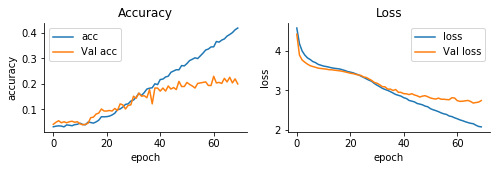

In [42]:
plot_training_curves(history_lrcn.history);

In [43]:
score = model_lrcn.evaluate(X_lrcn_test, Y_lrcn_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.75627055931
Test accuracy: 0.210000000238
